In [60]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

In [61]:
df1=pd.read_csv("corn_data.csv")

In [62]:
df1.head()

,date,open,high,low,close,volume
0,2000-07-17,182.25,182.25,178.25,179.25,19385
1,2000-07-18,179.00,183.25,179.00,180.75,25205
2,2000-07-19,180.00,182.75,178.75,182.00,17126
3,2000-07-20,181.50,187.00,181.00,186.00,18742
4,2000-07-21,185.50,188.00,185.00,187.75,16814


In [63]:
df1.date = pd.to_datetime(df1.date)

In [64]:
df2=pd.read_csv("Weather_Data.csv")

In [65]:
df2.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [66]:
df= columns_to_drop = ["Date/Time"]
df= df2.drop(columns=columns_to_drop, inplace=True) 


In [67]:
df2.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,-1.8,-3.9,86,4,8.0,101.24,Fog
1,-1.8,-3.7,87,4,8.0,101.24,Fog
2,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,-1.5,-3.3,88,7,4.8,101.23,Fog


In [68]:
df2.shape

(8784, 7)

In [69]:
df=df1.join(df2)

In [70]:
df

,date,open,high,low,close,volume,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,2000-07-17,182.25,182.25,178.25,179.25,19385,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2000-07-18,179.00,183.25,179.00,180.75,25205,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2000-07-19,180.00,182.75,178.75,182.00,17126,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2000-07-20,181.50,187.00,181.00,186.00,18742,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2000-07-21,185.50,188.00,185.00,187.75,16814,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5951,2024-05-02,442.75,452.25,442.50,452.00,2944,20.2,19.2,94,9,19.3,100.47,Rain
5952,2024-05-03,451.25,458.50,446.75,447.00,2540,20.3,19.1,93,13,19.3,100.43,Rain
5953,2024-05-06,447.00,458.50,444.50,457.00,1907,20.0,18.6,92,13,16.1,100.35,Rain
5954,2024-05-07,457.00,459.50,453.75,453.75,1021,19.1,18.2,95,17,25.0,100.35,Rain


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5956 entries, 0 to 5955
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              5956 non-null   datetime64[ns]
 1   open              5956 non-null   float64       
 2   high              5956 non-null   float64       
 3   low               5956 non-null   float64       
 4   close             5956 non-null   float64       
 5   volume            5956 non-null   int64         
 6   Temp_C            5956 non-null   float64       
 7   Dew Point Temp_C  5956 non-null   float64       
 8   Rel Hum_%         5956 non-null   int64         
 9   Wind Speed_km/h   5956 non-null   int64         
 10  Visibility_km     5956 non-null   float64       
 11  Press_kPa         5956 non-null   float64       
 12  Weather           5956 non-null   object        
dtypes: datetime64[ns](1), float64(8), int64(3), object(1)
memory usage: 605.0+ KB


In [72]:
df = df[df.date >= '2012-01-01'].reset_index(drop=True)
df

,date,open,high,low,close,volume,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,2012-01-03,662.00,664.25,653.00,658.50,158650,2.3,-9.7,41,11,25.0,101.55,Clear
1,2012-01-04,658.00,661.75,653.50,658.50,142010,1.9,-9.9,41,9,25.0,101.56,Mostly Cloudy
2,2012-01-05,658.00,659.75,639.50,643.50,184873,0.8,-9.1,47,6,25.0,101.55,Mostly Cloudy
3,2012-01-06,642.00,649.50,640.25,643.50,138311,0.8,-8.8,49,7,25.0,101.52,Cloudy
4,2012-01-09,643.00,663.00,642.75,652.00,178662,1.3,-8.7,47,11,25.0,101.49,Mainly Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3098,2024-05-02,442.75,452.25,442.50,452.00,2944,20.2,19.2,94,9,19.3,100.47,Rain
3099,2024-05-03,451.25,458.50,446.75,447.00,2540,20.3,19.1,93,13,19.3,100.43,Rain
3100,2024-05-06,447.00,458.50,444.50,457.00,1907,20.0,18.6,92,13,16.1,100.35,Rain
3101,2024-05-07,457.00,459.50,453.75,453.75,1021,19.1,18.2,95,17,25.0,100.35,Rain


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3103 entries, 0 to 3102
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              3103 non-null   datetime64[ns]
 1   open              3103 non-null   float64       
 2   high              3103 non-null   float64       
 3   low               3103 non-null   float64       
 4   close             3103 non-null   float64       
 5   volume            3103 non-null   int64         
 6   Temp_C            3103 non-null   float64       
 7   Dew Point Temp_C  3103 non-null   float64       
 8   Rel Hum_%         3103 non-null   int64         
 9   Wind Speed_km/h   3103 non-null   int64         
 10  Visibility_km     3103 non-null   float64       
 11  Press_kPa         3103 non-null   float64       
 12  Weather           3103 non-null   object        
dtypes: datetime64[ns](1), float64(8), int64(3), object(1)
memory usage: 315.3+ KB


In [74]:
le=LabelEncoder()
df["Weather"] = le.fit_transform(df["Weather"])

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3103 entries, 0 to 3102
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              3103 non-null   datetime64[ns]
 1   open              3103 non-null   float64       
 2   high              3103 non-null   float64       
 3   low               3103 non-null   float64       
 4   close             3103 non-null   float64       
 5   volume            3103 non-null   int64         
 6   Temp_C            3103 non-null   float64       
 7   Dew Point Temp_C  3103 non-null   float64       
 8   Rel Hum_%         3103 non-null   int64         
 9   Wind Speed_km/h   3103 non-null   int64         
 10  Visibility_km     3103 non-null   float64       
 11  Press_kPa         3103 non-null   float64       
 12  Weather           3103 non-null   int32         
dtypes: datetime64[ns](1), float64(8), int32(1), int64(3)
memory usage: 303.2 KB


In [76]:
df

,date,open,high,low,close,volume,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,2012-01-03,662.00,664.25,653.00,658.50,158650,2.3,-9.7,41,11,25.0,101.55,0
1,2012-01-04,658.00,661.75,653.50,658.50,142010,1.9,-9.9,41,9,25.0,101.56,6
2,2012-01-05,658.00,659.75,639.50,643.50,184873,0.8,-9.1,47,6,25.0,101.55,6
3,2012-01-06,642.00,649.50,640.25,643.50,138311,0.8,-8.8,49,7,25.0,101.52,1
4,2012-01-09,643.00,663.00,642.75,652.00,178662,1.3,-8.7,47,11,25.0,101.49,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3098,2024-05-02,442.75,452.25,442.50,452.00,2944,20.2,19.2,94,9,19.3,100.47,7
3099,2024-05-03,451.25,458.50,446.75,447.00,2540,20.3,19.1,93,13,19.3,100.43,7
3100,2024-05-06,447.00,458.50,444.50,457.00,1907,20.0,18.6,92,13,16.1,100.35,7
3101,2024-05-07,457.00,459.50,453.75,453.75,1021,19.1,18.2,95,17,25.0,100.35,7


In [77]:
df.isnull().sum()

date                0
open                0
high                0
low                 0
close               0
volume              0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [78]:
df.describe()

,date,open,high,low,close,volume,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
count,3103,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000
mean,2018-03-06 11:56:31.169835776,476.704560,482.032307,471.686996,476.774815,127621.252336,20.139188,12.167999,62.606188,13.195617,31.507541,100.927341,4.058653
min,2012-01-03 00:00:00,302.000000,307.250000,300.250000,301.500000,0.000000,-0.700000,-12.000000,18.000000,0.000000,0.400000,99.390000,0.000000
25%,2015-02-03 12:00:00,365.500000,368.500000,362.375000,365.250000,81062.500000,16.600000,9.000000,50.000000,8.000000,24.100000,100.560000,1.000000
50%,2018-03-07 00:00:00,416.000000,419.750000,410.750000,416.500000,130091.000000,20.600000,12.800000,64.000000,13.000000,25.000000,100.930000,5.000000
75%,2021-04-08 12:00:00,599.375000,606.875000,591.250000,599.250000,176743.500000,24.000000,16.700000,75.000000,17.000000,48.300000,101.350000,6.000000
max,2024-05-08 00:00:00,830.250000,843.750000,822.750000,831.250000,523849.000000,33.000000,24.400000,99.000000,44.000000,48.300000,102.410000,16.000000
std,NaN,139.443174,141.810809,137.309693,139.561701,82228.517683,5.471177,5.697682,17.016099,7.049980,12.461907,0.563101,2.638389


In [79]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 13)


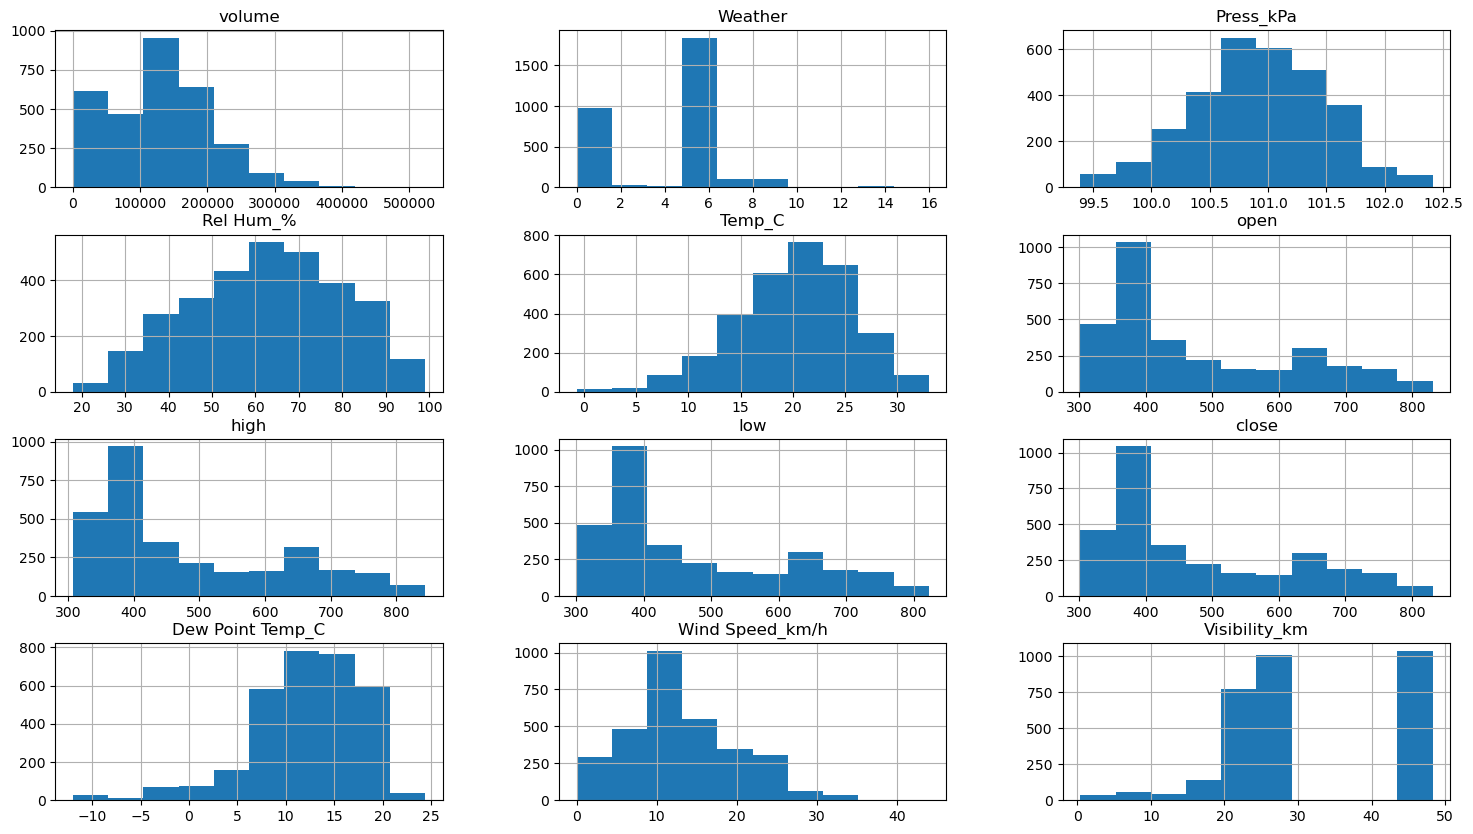

In [80]:
# Plotting histograms of multiple columns together
df.hist(["volume", "Weather", "Press_kPa", "Rel Hum_%", "Temp_C","open","high","low","close","Dew Point Temp_C","Wind Speed_km/h","Visibility_km"], figsize=(18,10));

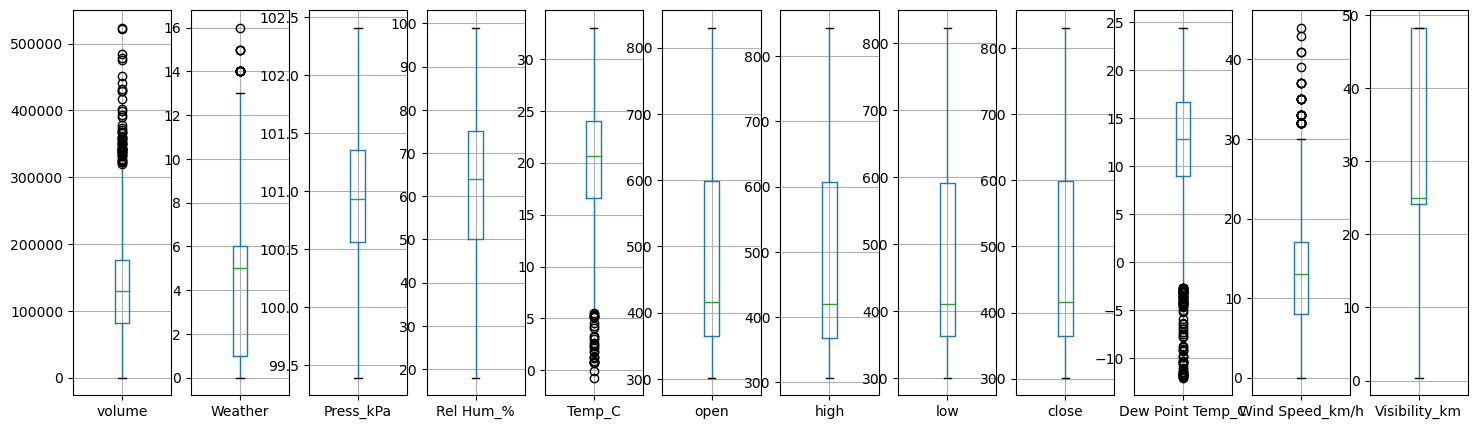

In [81]:
# Box plots for Categorical Target Variable "Clicked" and continuous predictors
ContinuousColsList = ["volume", "Weather", "Press_kPa", "Rel Hum_%", "Temp_C","open","high","low","close","Dew Point Temp_C","Wind Speed_km/h","Visibility_km"]

fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "Clicked"
for PredictorCol , i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    df.boxplot(column=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

In [82]:
# Conventional way to import seaborn
import seaborn as sns

# To visualise in the notebook
%matplotlib inline

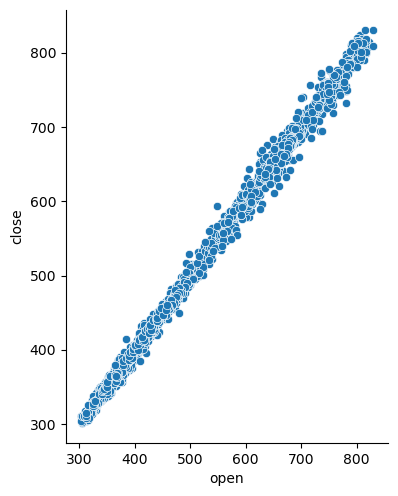

In [83]:
# Visualise the relationship between the features and the response using scatterplots
sns.pairplot(df, x_vars=['open'], y_vars='close',size = 5, aspect = 0.8, kind = 'scatter')

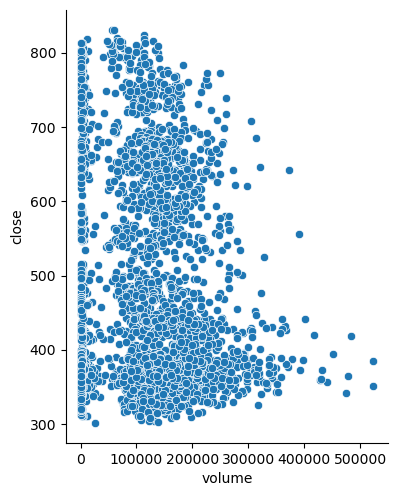

In [84]:
# Visualise the relationship between the features and the response using scatterplots
sns.pairplot(df, x_vars=['volume'], y_vars='close',size = 5, aspect = 0.8, kind = 'scatter')

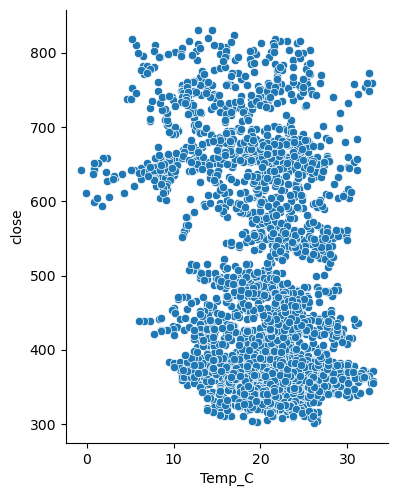

In [85]:
# Visualise the relationship between the features and the response using scatterplots
sns.pairplot(df, x_vars=['Temp_C'], y_vars='close',size = 5, aspect = 0.8, kind = 'scatter')

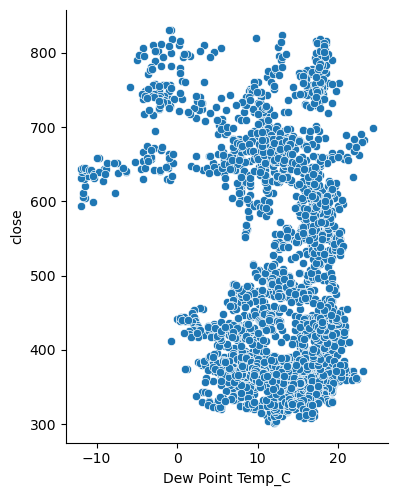

In [86]:
# Visualise the relationship between the features and the response using scatterplots
sns.pairplot(df, x_vars=['Dew Point Temp_C'], y_vars='close',size = 5, aspect = 0.8, kind = 'scatter')

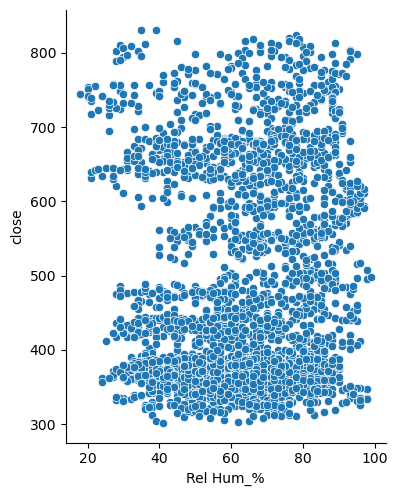

In [87]:
# Visualise the relationship between the features and the response using scatterplots
sns.pairplot(df, x_vars=['Rel Hum_%'], y_vars='close',size = 5, aspect = 0.8, kind = 'scatter')

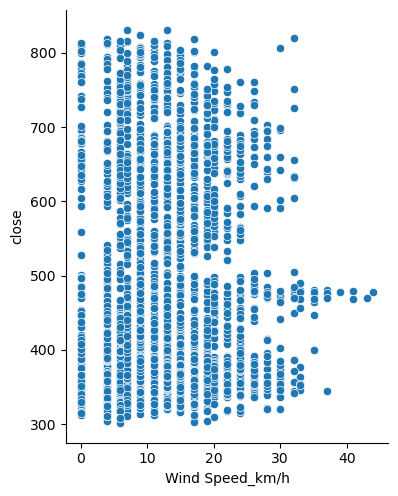

In [88]:
# Visualise the relationship between the features and the response using scatterplots
sns.pairplot(df, x_vars=['Wind Speed_km/h'], y_vars='close',size = 5, aspect = 0.8, kind = 'scatter')

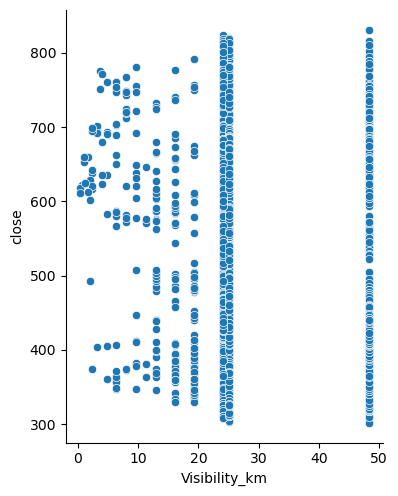

In [89]:
# Visualise the relationship between the features and the response using scatterplots
sns.pairplot(df, x_vars=['Visibility_km'], y_vars='close',size = 5, aspect = 0.8, kind = 'scatter')

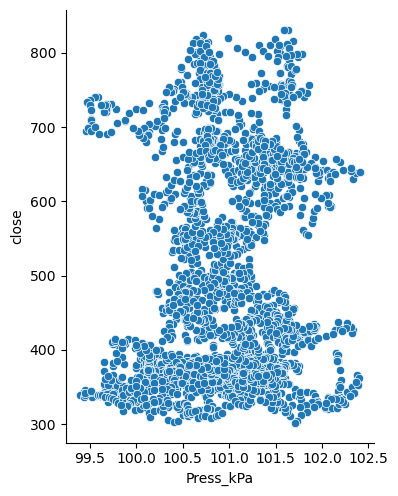

In [90]:
# Visualise the relationship between the features and the response using scatterplots
sns.pairplot(df, x_vars=['Press_kPa'], y_vars='close',size = 5, aspect = 0.8, kind = 'scatter')

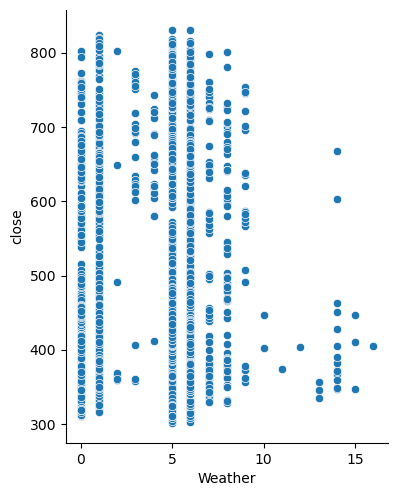

In [91]:
# Visualise the relationship between the features and the response using scatterplots
sns.pairplot(df, x_vars=['Weather'], y_vars='close',size = 5, aspect = 0.8, kind = 'scatter')

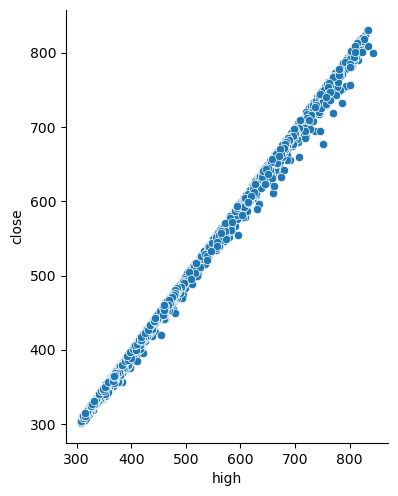

In [92]:
# Visualise the relationship between the features and the response using scatterplots
sns.pairplot(df, x_vars=['high'], y_vars='close',size = 5, aspect = 0.8, kind = 'scatter')

In [93]:
X = df.drop(columns=['close'])
y = df['close']

In [94]:
from sklearn.preprocessing import Normalizer

# Initialize RobustScaler
scaler = Normalizer()

# Fit scaler to data and transform data
scaled_data = scaler.fit_transform(X)

print("Original Data:")
print(X)
print("\nScaled Data:")
print(scaled_data)


TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted by <class 'numpy.dtype[float64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[int32]'>)

In [ ]:
splitSize = 0.30
split = round(len(X) * splitSize)
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [ ]:
model = LinearRegression().fit(X_train, y_train)

In [ ]:
print('Training R2 score {} %'.format(round(model.score(X_train, y_train) * 100, 2)))

In [ ]:
print('Test R2 score {} %'.format(round(model.score(X_test, y_test) * 100, 2)))

In [ ]:
from sklearn.model_selection import cross_val_score

cvs = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
print(cvs, "\n Mean Accuracy :", cvs.mean(), "\nStandard Deviation :", cvs.std())

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
type(y_pred)

In [ ]:
plotSplit = 700
plt.figure(figsize=(10,10))
plt.scatter(y_test[plotSplit:], y_pred[plotSplit:], c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred[plotSplit:]), max(y_test[plotSplit:]))
p2 = min(min(y_pred[plotSplit:]), min(y_test[plotSplit:]))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show();

In [ ]:
import matplotlib.pyplot as plt

# Generating index
c = [i for i in range(1, 2173, 1)]

fig = plt.figure()
plt.plot(c, y_test, color="blue", linewidth=1.5, linestyle="-", label="Actual")
plt.plot(c, y_pred, color="red", linewidth=1.5, linestyle="-", label="Predicted")
fig.suptitle('Actual vs Predicted', fontsize=20)  # Plot heading
plt.xlabel('Index', fontsize=18)  # X-label
plt.ylabel('Value', fontsize=16)  # Y-label
plt.legend(loc='upper left')
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
plt.figure(33)
plt.scatter(df['open'],df['close'],s=1)
regression = LinearRegression()
x=df['open']
x=x.values.reshape(-1, 1)
y=df['close']
regression.fit(x,y)
Y_pred = regression.predict(x)
plt.plot(x, Y_pred, label='Línea de regresión', color='yellow')
r2 = r2_score(y, Y_pred)
m = regression.coef_[0]
b = regression.intercept_
ecuacion_recta = f'Recta: y = {m:.2f}x + {b:.2f}'
r2_text = f'R^2 = {r2:.2f}'
plt.text(0.2, 0.9, ecuacion_recta, fontsize=12, transform=plt.gca().transAxes)
plt.text(0.2, 0.85, r2_text, fontsize=12, transform=plt.gca().transAxes)

In [ ]:
error = y_test - y_pred

In [ ]:
y_test

In [ ]:
y_pred

In [ ]:
error

In [ ]:
# Error terms
c = [i for i in range(1,2173,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=7.5, linestyle="-");
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16);                # Y-label

In [ ]:
mse = mean_squared_error(y_test, y_pred)

In [ ]:
r_squared = r2_score(y_test, y_pred)

In [ ]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor  
from sklearn import svm

In [ ]:
param_grid = {
    'n_estimators': [500],
    'max_depth': [50],
    'min_samples_split': [5],
    'min_samples_leaf': [2],
    'bootstrap': [True]
}


rf_model = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid,
    n_iter=1, 
    cv=5,         
    random_state=42,
    n_jobs=-1)     


random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_model = random_search.best_estimator_
print("Better hyperparameters:", best_params)

best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

feature_importance = best_model.feature_importances_
feature_names = X.columns
plt.figure(42)
plt.figure(figsize=(10, 6));
plt.barh(range(len(feature_names)), feature_importance, align='center')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Feature Importance')
plt.title('Importance of Features in the Random Forest Model')

plt.figure(41)
y_test2=y_test.values.reshape(-1, 1)
regression.fit(y_test2,y_pred)

plt.scatter(y_test2,y_pred,s=1)
r2 = r2_score(y_test2,y_pred)
m = regression.coef_[0]
b = regression.intercept_
ecuacion_recta = f'Recta: y = {m:.2f}x + {b:.2f}'
r2_text = f'R^2 = {r2:.5f}'
plt.text(0.2, 0.9, ecuacion_recta, fontsize=12, transform=plt.gca().transAxes);
plt.text(0.2, 0.85, r2_text, fontsize=12, transform=plt.gca().transAxes);

In [95]:
df = df
# Ensure 'close' column exists and drop NaN values
if 'close' in df.columns:
    # Calculate daily returns
    df['Returns'] = df['close'].pct_change()

    
# Drop NaN values (due to pct_change and rolling calculation)
df.dropna(inplace=True)

In [96]:
df = df.drop(['open', 'high', 'low', 'volume'], axis=1)

In [97]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd

from itertools import product
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_log_error

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [98]:
from statsmodels.tsa.stattools import adfuller
# Augmented Dickey-Fuller test (ADF Test)
ad_fuller_result = adfuller(df['Returns'])

# Display the outcome of Augmented Dicky-Fuller Test
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -28.743916403099803
p-value: 0.0


In [99]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
# A nested loop is written to calculate the AIC values
aicVal=[]
for d in range(1,3):
    for ari in range(0, 3):
        for maj in range(0,3):
            try:
                arima_obj = ARIMA(df['Returns'], order=(ari,d,maj))
                arima_obj_fit=arima_obj.fit()
                aicVal.append([ari, d, maj, arima_obj_fit.aic])
            except ValueError:
                pass
print(aicVal)

[[0, 1, 0, -14331.9493500761], [0, 1, 1, -16471.22945523956], [0, 1, 2, -16467.677410480464], [1, 1, 0, -15176.957544356657], [1, 1, 1, -16469.22950129187], [1, 1, 2, -16468.03433369676], [2, 1, 0, -15600.734446197217], [2, 1, 1, -16468.37646902811], [2, 1, 2, -16465.96086792193], [0, 2, 0, -10944.361207896365], [0, 2, 1, -14315.821905203466], [0, 2, 2, -16298.940504053182], [1, 2, 0, -12663.800605986558], [1, 2, 1, -15159.563673442426], [1, 2, 2, -16435.559294499093], [2, 2, 0, -13671.650126219442], [2, 2, 1, -15582.473499049604], [2, 2, 2, -16380.911921097402]]


In [100]:
# order = (2, 1, 2) means 
# First 2 for auto regressive model, 1 for difference, and second 2 for moving average
# seasonal_order = (2, 1, 2, 12) means
# 12 additional parameter means number of observations per year or the period
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the exogenous variables
exog_variables = ['Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']
exog_data = df[exog_variables]

# Fit SARIMAX model with exogenous variables
best_model = SARIMAX(
    df['Returns'],
    exog=exog_data,
    order=(0, 1, 1),
    seasonal_order=(0, 1, 1, 5)
).fit()

# Display the summary of the model
print(best_model.summary())


                                     SARIMAX Results                                     
Dep. Variable:                           Returns   No. Observations:                 3102
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 5)   Log Likelihood                7724.271
Date:                           Wed, 30 Oct 2024   AIC                         -15432.542
Time:                                   14:58:39   BIC                         -15384.239
Sample:                                        0   HQIC                        -15415.195
                                          - 3102                                         
Covariance Type:                             opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Temp_C             -0.0003      0.000     -0.870      0.385      -0.001       0.000
Rel Hum_%         9.21e-07  

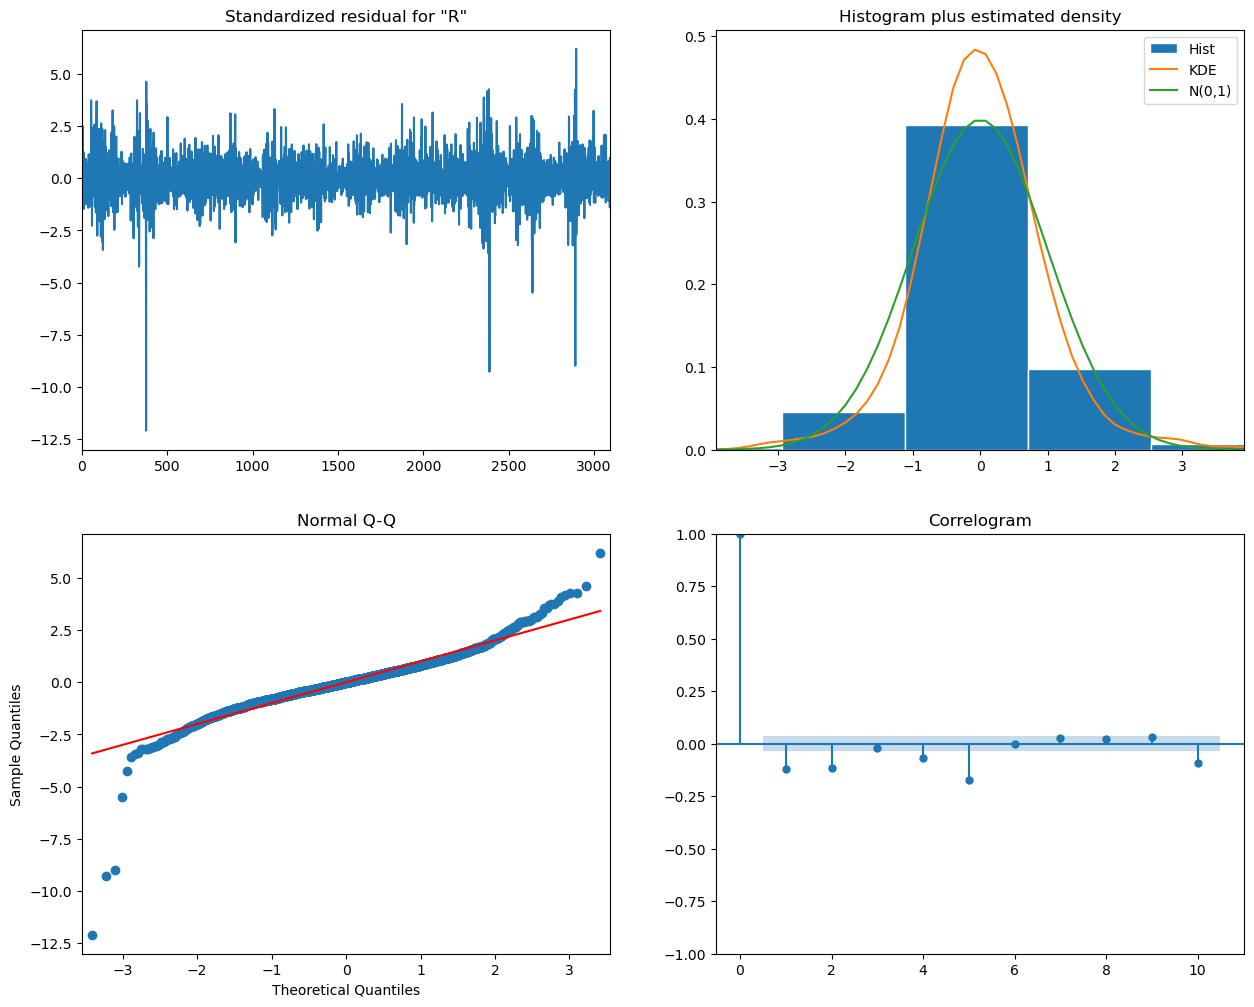

In [101]:
# Diagnosing the model residuals
best_model.plot_diagnostics(figsize = (15, 12))
plt.show()

In [102]:
df

,date,close,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Returns
1,2012-01-04,658.50,1.9,-9.9,41,9,25.0,101.56,6,0.000000
2,2012-01-05,643.50,0.8,-9.1,47,6,25.0,101.55,6,-0.022779
3,2012-01-06,643.50,0.8,-8.8,49,7,25.0,101.52,1,0.000000
4,2012-01-09,652.00,1.3,-8.7,47,11,25.0,101.49,5,0.013209
5,2012-01-10,652.00,1.3,-7.5,52,11,25.0,101.49,5,0.000000
...,...,...,...,...,...,...,...,...,...,...
3098,2024-05-02,452.00,20.2,19.2,94,9,19.3,100.47,7,0.019741
3099,2024-05-03,447.00,20.3,19.1,93,13,19.3,100.43,7,-0.011062
3100,2024-05-06,457.00,20.0,18.6,92,13,16.1,100.35,7,0.022371
3101,2024-05-07,453.75,19.1,18.2,95,17,25.0,100.35,7,-0.007112
